In [1]:
import pandas as pd
import numpy as np
np.random.seed(2018)

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def map_to_int(x):
    return int(x.split(' ')[1])

train = pd.read_csv('../input/train.csv.zip', compression='zip', index_col='id', converters={'location': map_to_int})
test = pd.read_csv('../input/test.csv.zip', compression='zip', index_col='id', converters={'location': map_to_int})

event_type = pd.read_csv('../input/event_type.csv.zip', compression='zip', index_col='id', converters={'event_type': map_to_int})
resource_type = pd.read_csv('../input/resource_type.csv.zip', compression='zip', index_col='id', converters={'resource_type': map_to_int})
severity_type = pd.read_csv('../input/severity_type.csv.zip', compression='zip', index_col='id', converters={'severity_type': map_to_int})
log_feature = pd.read_csv('../input/log_feature.csv.zip', compression='zip', index_col='id', converters={'log_feature': map_to_int})


train_test = pd.concat([train, test],ignore_index=True)

## Success Metric

Log loss

## Basic Model

In [3]:
train.head()

,location,fault_severity
id,,
14121,118,1
9320,91,0
14394,152,1
8218,931,1
14804,120,0


In [4]:
X = train[ ['location'] ].values
y = train['fault_severity'].values


model = DummyClassifier()
model.fit(X, y)
y_pred = model.predict_proba(X)


log_loss(y, y_pred)

17.463584000244776

## DecisionTree and RandomForest

In [5]:
def cv_model(model, X, y, n_splits=5):

    scores = []
    skf = StratifiedKFold(n_splits=n_splits, random_state=2018, shuffle=True)

    for train_idx, test_idx in skf.split(X, y):
        model.fit(X[train_idx], y[train_idx])
        y_pred = model.predict_proba(X[test_idx])

        scores.append( log_loss(y[test_idx], y_pred) )
        
    return np.mean(scores), np.std(scores)

In [6]:
X = train[ ['location'] ].values
y = train['fault_severity'].values

cv_model(DecisionTreeClassifier(max_depth=5, random_state=2018), X, y)

(0.79905306640057527, 0.059604769840425779)

In [7]:
X = train[ ['location'] ].values
y = train['fault_severity'].values

cv_model(RandomForestClassifier(max_depth=5, random_state=2018), X, y)

(0.74144704871610645, 0.020471148395015248)

## Submit

In [8]:
X_train = train[ ['location'] ].values
y_train = train['fault_severity'].values

X_test  = test[ ['location'] ].values


model = RandomForestClassifier(max_depth=5, random_state=2018)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

test['predict_0'] = y_pred[:,0]
test['predict_1'] = y_pred[:,1]
test['predict_2'] = y_pred[:,2]


test[ ['predict_0', 'predict_1', 'predict_2'] ].to_csv('../output/simple_rf.csv')

![](../images/simple_rf.png)

## Feature Engineering

In [9]:
print(train.head())
print(test.head())
print("")
print(event_type.head())
print(resource_type.head())
print(severity_type.head())
print(log_feature.head())


       location  fault_severity
id                             
14121       118               1
9320         91               0
14394       152               1
8218        931               1
14804       120               0
       location  predict_0  predict_1  predict_2
id                                              
11066       481   0.872812   0.126701   0.000487
18000       962   0.456281   0.318153   0.225566
16964       491   1.000000   0.000000   0.000000
4795        532   0.563060   0.355537   0.081403
3392        600   0.531476   0.274772   0.193752

      event_type
id              
6597          11
8011          15
2597          15
5022          15
5022          11
      resource_type
id                 
6597              8
8011              8
2597              8
5022              8
6852              8
      severity_type
id                 
6597              2
8011              2
2597              2
5022              1
6852              1
      log_feature  volume
id     

In [10]:
tmp_severity_type = pd.merge(severity_type, train, left_index=True, right_index=True)
tmp_severity_type.head()

,severity_type,location,fault_severity
id,,,
8011,2,1,0
2588,1,1,0
4848,1,1,0
6914,1,1,0
5337,1,1,0


## severity_type

In [11]:
combined_train = pd.merge(severity_type, train, left_index=True, right_index=True)
combined_test = pd.merge(severity_type, test, left_index=True, right_index=True)

combined_train

,severity_type,location,fault_severity
id,,,
8011,2,1,0
2588,1,1,0
4848,1,1,0
6914,1,1,0
5337,1,1,0
15494,1,1,0
2250,1,1,0
5259,1,1,0
4703,1,1,2


In [12]:
combined_train.location.value_counts().head()

821     85
1107    78
734     75
1008    71
126     71
Name: location, dtype: int64

In [13]:
tmp_exp = combined_train[ combined_train.location == 821 ].reset_index()
tmp_exp['id'] = tmp_exp.index
tmp_exp.shape

(85, 4)

In [14]:
def plot_by_location(location_id):
    tmp_exp = combined_train[ combined_train.location == location_id ].reset_index()
    tmp_exp['id'] = tmp_exp.index


    sns.set(rc={'figure.figsize':(15,5)})

    plt.plot( tmp_exp[ tmp_exp.fault_severity == 0 ].id, tmp_exp[ tmp_exp.fault_severity == 0 ].fault_severity, 'o' )
    plt.plot( tmp_exp[ tmp_exp.fault_severity == 1 ].id, tmp_exp[ tmp_exp.fault_severity == 1 ].fault_severity, 'o' )
    plt.plot( tmp_exp[ tmp_exp.fault_severity == 2 ].id, tmp_exp[ tmp_exp.fault_severity == 2 ].fault_severity, 'o' )
    plt.title("Location {0}".format(location_id), fontsize=20)
    plt.xlabel("Num", fontsize=16)
    plt.ylabel("Fault severity", fontsize=16)
    plt.show()

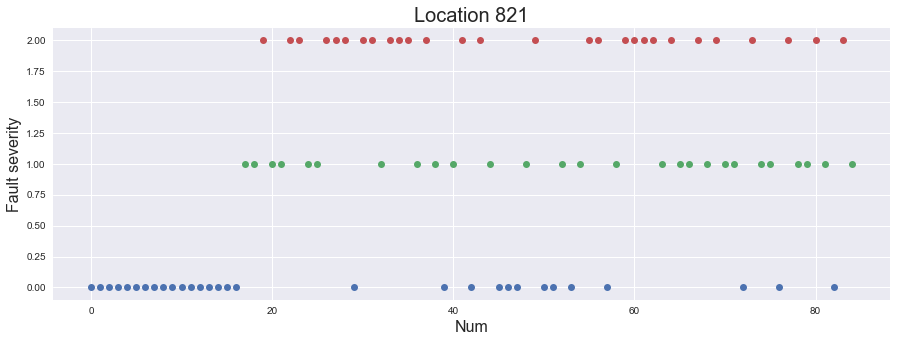

In [15]:
plot_by_location(821)

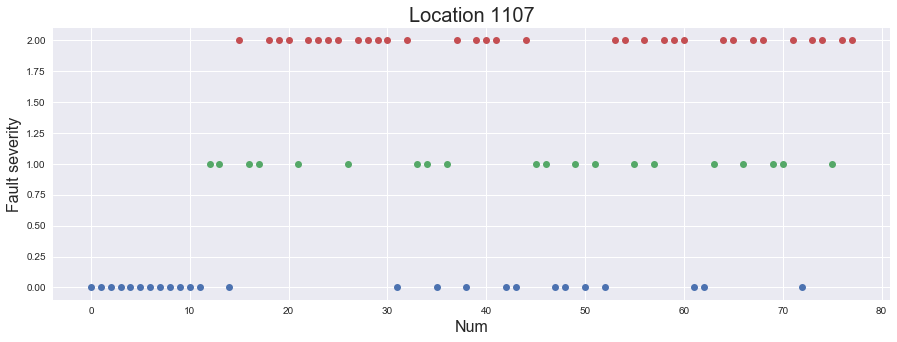

In [16]:
plot_by_location(1107)

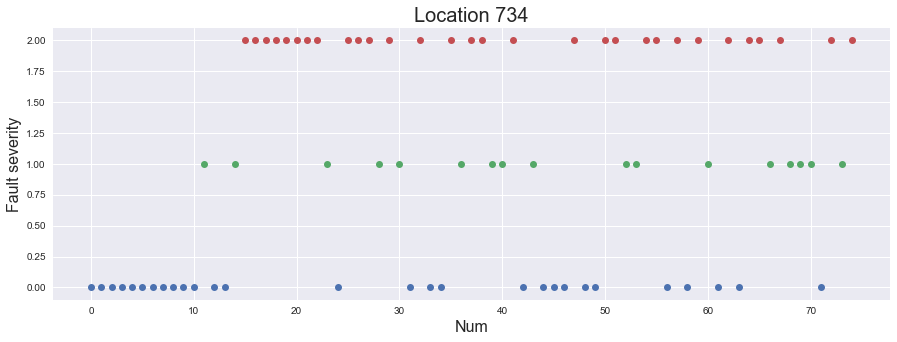

In [17]:
plot_by_location(734)

In [18]:
X = combined_train[ ['location'] ].values
y = combined_train['fault_severity'].values
cv_model(RandomForestClassifier(max_depth=5, random_state=2018), X, y)

(0.7429308808370072, 0.0092979929847704489)

In [19]:
X = combined_train[ ['location', 'severity_type'] ].values
y = combined_train['fault_severity'].values
cv_model(RandomForestClassifier(max_depth=5, random_state=2018), X, y)

(0.72502870667650188, 0.0086042625478220999)

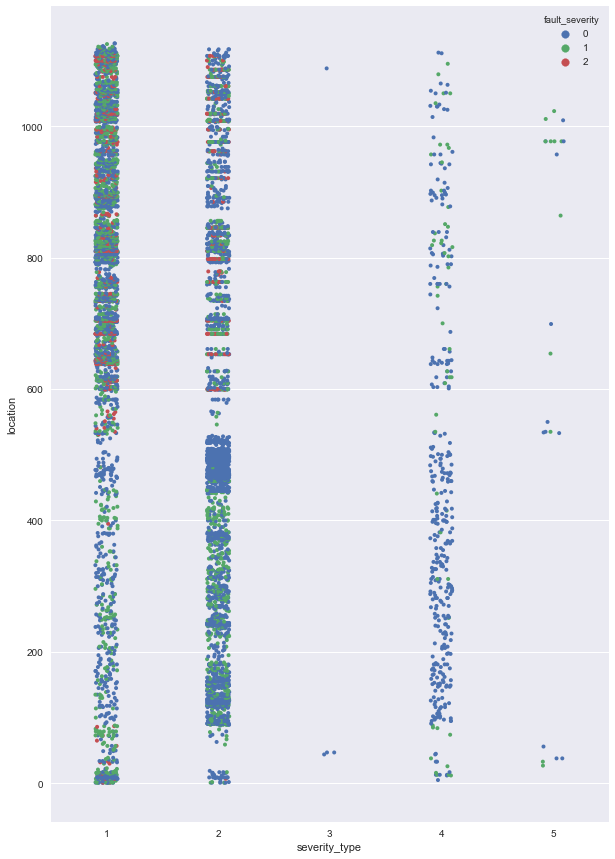

In [20]:
sns.set(rc={'figure.figsize':(10,15)})
sns.stripplot(x="severity_type", y="location", hue="fault_severity", data=combined_train, size=4, jitter=True)

In [21]:
combined_train.groupby('location')['fault_severity'].agg(lambda x: x.shape).head()

location
1    (24,)
2     (7,)
3     (2,)
4     (2,)
5     (1,)
Name: fault_severity, dtype: object

In [22]:
combined_train['time'] = combined_train.groupby('location')['severity_type'].transform(lambda x: np.arange(x.shape[0])+1)
combined_train['reverse_time'] = combined_train.groupby('location')['severity_type'].transform(lambda x: np.arange(x.shape[0])[::-1]+1)

combined_test['time'] = combined_test.groupby('location')['severity_type'].transform(lambda x: np.arange(x.shape[0])[::-1]+1 )
combined_test['reverse_time'] = combined_test.groupby('location')['severity_type'].transform(lambda x: np.arange(x.shape[0])[::-1]+1 )
combined_test.head()

,severity_type,location,predict_0,predict_1,predict_2,time,reverse_time
id,,,,,,,
6597,2,1,0.629122,0.314588,0.05629,45,45
2597,2,1,0.629122,0.314588,0.05629,44,44
5022,1,1,0.629122,0.314588,0.05629,43,43
6852,1,1,0.629122,0.314588,0.05629,42,42
5611,2,1,0.629122,0.314588,0.05629,41,41


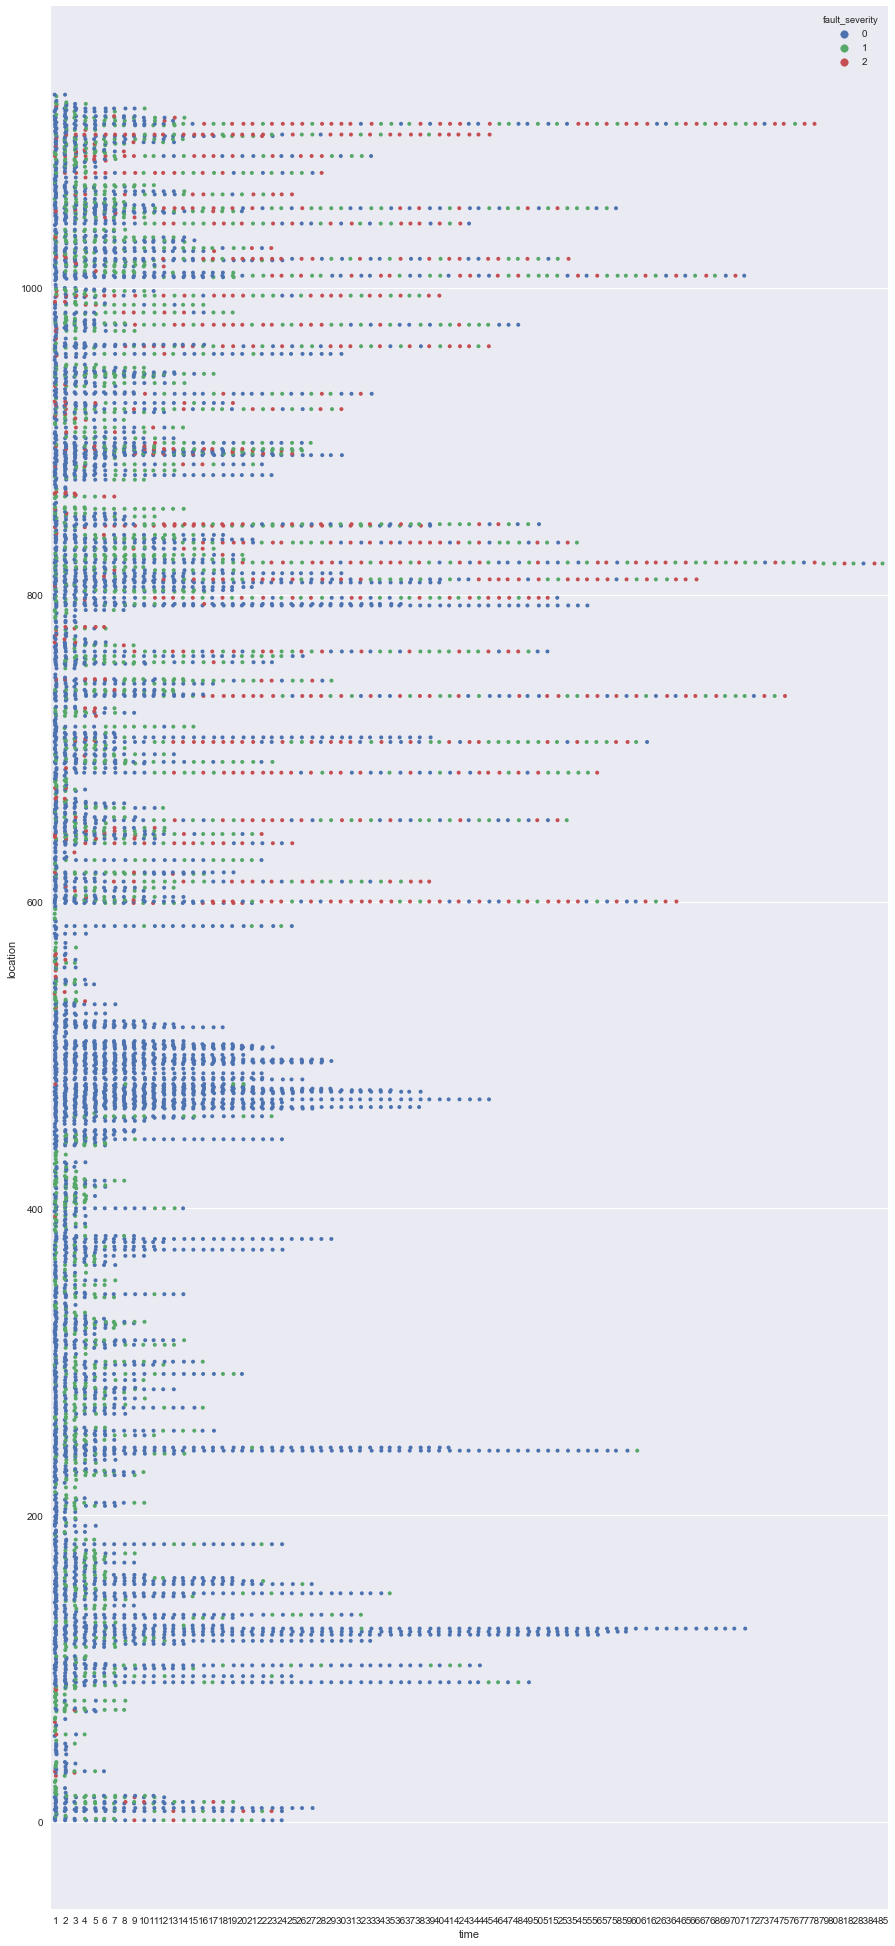

In [23]:
sns.set(rc={'figure.figsize':(15,35)})
sns.stripplot(x="time", y="location", hue="fault_severity", data=combined_train, size=4, jitter=True)

In [24]:
X = combined_train[ ['location', 'severity_type', 'time'] ].values
y = combined_train['fault_severity'].values
cv_model(RandomForestClassifier(max_depth=5, random_state=2018), X, y)

(0.71370609210502989, 0.012449667020781688)

In [25]:
X = combined_train[ ['location', 'severity_type', 'reverse_time'] ].values
y = combined_train['fault_severity'].values
cv_model(RandomForestClassifier(max_depth=5, random_state=2018), X, y)

(0.72495804098308736, 0.0078773925711360139)

In [26]:
X = combined_train[ ['location', 'severity_type', 'time', 'reverse_time'] ].values
y = combined_train['fault_severity'].values
cv_model(RandomForestClassifier(max_depth=5, random_state=2018), X, y)

(0.68304471280937606, 0.0093731121183200424)

In [27]:
dummy_severity_type = pd.get_dummies( severity_type, columns=['severity_type'] )
tmp_combined_train = pd.merge(combined_train, dummy_severity_type, left_index=True, right_index=True)

feats = ['location', 'severity_type', 'time', 'reverse_time']
# feats += ['severity_type_1', 'severity_type_2',
#        'severity_type_3', 'severity_type_4', 'severity_type_5']

X = tmp_combined_train[ feats ].values
y = tmp_combined_train['fault_severity'].values
cv_model(RandomForestClassifier(max_depth=10, n_estimators=200, random_state=2018), X, y)

(0.63945762013176011, 0.010337342778047615)

### Location count

In [28]:
location_count = combined_train[ ['location', 'time'] ].groupby('location').agg(len).to_dict()['time']
combined_train['location_count'] = combined_train['location'].map(lambda x: location_count[x])

location_count = combined_test[ ['location', 'time'] ].groupby('location').agg(len).to_dict()['time']
combined_test['location_count'] = combined_test['location'].map(lambda x: location_count[x])

In [29]:
X = combined_train[ ['location', 'severity_type', 'time', 'reverse_time', 'location_count'] ].values
y = combined_train['fault_severity'].values
cv_model(RandomForestClassifier(max_depth=10, n_estimators=200, random_state=2018), X, y)

(0.63246942712657073, 0.011559251445810059)

### Event type

In [30]:
event_type.head()

,event_type
id,
6597,11
8011,15
2597,15
5022,15
5022,11


In [31]:
def group_et_by_location(df):
    agg_et = pd.merge(df, event_type, left_index=True, right_index=True)
    
    agg_funcs = [np.median, np.mean, np.max, np.min, len, np.sum]
    
    for agg_func in agg_funcs:
        dict_et_by_location = agg_et.groupby('location')['event_type'].agg(agg_func).to_dict()
        df['{0}_et_by_location'.format(agg_func.__name__)] = df.location.map(lambda x: dict_et_by_location[x])
    
    return df

combined_train = group_et_by_location(combined_train)
combined_test = group_et_by_location(combined_test)

In [35]:
feats = ['location', 'severity_type', 'time', 'reverse_time', 'location_count']
feats += ['median_et_by_location', 'mean_et_by_location', 'amax_et_by_location', 'amin_et_by_location', 'len_et_by_location', 'sum_et_by_location', ]

X = combined_train[ feats ].values
y = combined_train['fault_severity'].values
cv_model(RandomForestClassifier(max_depth=10, n_estimators=200, random_state=2018), X, y)

(0.60578884351513362, 0.010196707775656675)

In [36]:
event_type.event_type.value_counts(normalize=True).head(15)

11    0.253064
35    0.212223
34    0.190151
15    0.141001
20    0.046776
54    0.021944
13    0.018672
42    0.015335
44    0.014950
23    0.013763
14    0.010587
43    0.009817
22    0.007154
50    0.004941
10    0.004652
Name: event_type, dtype: float64

The most common events: 11, 35, 34 and 15. Let's verify how this is related with `fault_severity`.

In [38]:
def map_event_type(x):
    if x in [11, 35, 34]: return 'high'
    if x in [15, 20,54,13,42,44,23, 14]: return 'medium'
    return 'low'


tmp_event_type = pd.merge(event_type, train, left_index=True, right_index=True)
tmp_event_type['event_type_map'] = tmp_event_type['event_type'].map(map_event_type)


In [39]:
dict_crosstab = pd.crosstab(tmp_event_type.event_type_map, tmp_event_type.fault_severity).apply(lambda r: r/r.sum(), axis=1).to_dict()
dict_crosstab

{0: {'high': 0.73396965247185508,
  'low': 0.49937421777221525,
  'medium': 0.47698026880183014},
 1: {'high': 0.21598139990210474,
  'low': 0.35419274092615771,
  'medium': 0.31226765799256506},
 2: {'high': 0.05004894762604014,
  'low': 0.14643304130162704,
  'medium': 0.2107520732056048}}

In [40]:
for fault_severity in [0, 1, 2]:
    tmp_event_type['event_type_map_{0}'.format(fault_severity)] = tmp_event_type['event_type_map'].map(lambda x: dict_crosstab[fault_severity][x] )

tmp_event_type[ ['event_type_map_0', 'event_type_map_1', 'event_type_map_2'] ].head()

,event_type_map_0,event_type_map_1,event_type_map_2
id,,,
1,0.73397,0.215981,0.050049
1,0.47698,0.312268,0.210752
5,0.73397,0.215981,0.050049
5,0.73397,0.215981,0.050049
6,0.73397,0.215981,0.050049


In [41]:
prob_event_type = tmp_event_type.groupby('id').agg(np.mean)[['event_type_map_0', 'event_type_map_1', 'event_type_map_2']]
prob_event_type.head()

,event_type_map_0,event_type_map_1,event_type_map_2
id,,,
1,0.605475,0.264125,0.130401
5,0.733970,0.215981,0.050049
6,0.733970,0.215981,0.050049
8,0.733970,0.215981,0.050049
13,0.733970,0.215981,0.050049


In [42]:
tmp_combined_train = pd.merge(combined_train, prob_event_type, left_index=True, right_index=True)
tmp_combined_train.head()

,severity_type,location,fault_severity,time,reverse_time,location_count,median_et_by_location,mean_et_by_location,amax_et_by_location,amin_et_by_location,len_et_by_location,sum_et_by_location,event_type_map_0,event_type_map_1,event_type_map_2
id,,,,,,,,,,,,,,,
8011,2,1,0,1,24,24,15.0,13.255814,20,7,43,570,0.476980,0.312268,0.210752
2588,1,1,0,2,23,24,15.0,13.255814,20,7,43,570,0.605475,0.264125,0.130401
4848,1,1,0,3,22,24,15.0,13.255814,20,7,43,570,0.605475,0.264125,0.130401
6914,1,1,0,4,21,24,15.0,13.255814,20,7,43,570,0.605475,0.264125,0.130401
5337,1,1,0,5,20,24,15.0,13.255814,20,7,43,570,0.605475,0.264125,0.130401


In [43]:
feats = ['location', 'severity_type', 'time', 'reverse_time', 'location_count']
feats += ['event_type_map_0', 'event_type_map_1', 'event_type_map_2']

X = tmp_combined_train[ feats ].values
y = tmp_combined_train['fault_severity'].values
cv_model(RandomForestClassifier(max_depth=10, n_estimators=200, random_state=2018), X, y)

(0.62369714829457323, 0.0061414092492333644)

In [44]:
combined_train = tmp_combined_train

## log_feature

In [ ]:
log_feature.head()

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
log_feature['volume'].hist(bins=100)

In [ ]:
log_feature['volume_log'] = np.log2( log_feature['volume'] + 1 )
log_feature['volume_log'].hist(bins=100)

In [48]:
log_feature.head()

,log_feature,volume
id,,
6597,68,6
8011,68,7
2597,68,1
5022,172,2
5022,56,1


In [ ]:
def group_lf_by_location(df):
    agg_lf = pd.merge(df, log_feature, left_index=True, right_index=True)

    agg_funcs = [np.median, np.mean, np.max, np.min, len, np.sum]
    
    for agg_func in agg_funcs:
        dict_volume_by_id = log_feature.groupby('id')['volume'].agg(agg_func)
        df['{0}_lf_volume_by_id'.format(agg_func.__name__)] = df.index.map(lambda x: dict_volume_by_id[x])
        
    for agg_func in agg_funcs:
        agg_dict_by_location = agg_lf.groupby('location')['log_feature'].agg(agg_func).to_dict()
        df['{0}_lf_by_location'.format(agg_func.__name__)] = df.location.map(lambda x: agg_dict_by_location[x])
        
    for agg_func in agg_funcs:
        agg_dict_by_location = agg_lf.groupby('location')['volume'].agg(agg_func).to_dict()
        df['{0}_lf_volume_by_location'.format(agg_func.__name__)] = df.location.map(lambda x: agg_dict_by_location[x])

    for agg_func in agg_funcs:
        agg_dict_by_location = agg_lf.groupby('location')['volume_log'].agg(agg_func).to_dict()
        df['{0}_lf_volume_log_by_location'.format(agg_func.__name__)] = df.location.map(lambda x: agg_dict_by_location[x])

    return df
    
combined_train = group_lf_by_location(combined_train)
combined_test = group_lf_by_location(combined_test)

In [ ]:
feats = ['location', 'severity_type', 'time', 'reverse_time', 'location_count']

feats += ['event_type_map_0', 'event_type_map_1', 'event_type_map_2']

feats += ['median_et_by_location', 'mean_et_by_location', 'max_et_by_location', 'min_et_by_location', 'len_et_by_location', 'sum_et_by_location', ]

feats += [ 'median_lf_by_location', 'mean_lf_by_location',
       'max_lf_by_location', 'min_lf_by_location', 'len_lf_by_location',
       'sum_lf_by_location', 'amax_lf_by_location', 'amin_lf_by_location' ]

feats += ['median_lf_volume_by_location', 'mean_lf_volume_by_location',
       'amax_lf_volume_by_location', 'amin_lf_volume_by_location',
       'len_lf_volume_by_location', 'sum_lf_volume_by_location']

# feats += ['median_lf_volume_log_by_location', 'mean_lf_volume_log_by_location',
#        'amax_lf_volume_log_by_location', 'amin_lf_volume_log_by_location',
#        'len_lf_volume_log_by_location', 'sum_lf_volume_log_by_location']

X = combined_train[ feats ].values
y = combined_train['fault_severity'].values
cv_model(RandomForestClassifier(max_depth=10, n_estimators=200, random_state=2018), X, y)

## resource_type

In [ ]:
resource_type_len = resource_type.groupby('id').agg(len).to_dict()['resource_type']
combined_train['resource_type_len'] = combined_train.index.map(lambda x: resource_type_len[x])
combined_test['resource_type_len'] = combined_test.index.map(lambda x: resource_type_len[x])

In [ ]:
def group_rt_by_location(df):
    agg_rt = pd.merge(df, resource_type, left_index=True, right_index=True)

    agg_funcs = [np.median, np.mean, np.max, np.min, len, np.sum]
    
    for agg_func in agg_funcs:
        agg_dict_by_location = agg_rt.groupby('location')['resource_type'].agg(agg_func).to_dict()
        df['{0}_rt_by_location'.format(agg_func.__name__)] = df.location.map(lambda x: agg_dict_by_location[x])
        
    return df

combined_train = group_rt_by_location(combined_train)
combined_test = group_rt_by_location(combined_test)


In [ ]:
feats = ['location', 'severity_type', 'time', 'reverse_time', 'location_count']
feats += ['event_type_map_0', 'event_type_map_1', 'event_type_map_2']

feats += ['median_et_by_location', 'mean_et_by_location', 'max_et_by_location', 'min_et_by_location', 'len_et_by_location', 'sum_et_by_location', ]

feats += [ 'median_lf_by_location', 'mean_lf_by_location',
       'max_lf_by_location', 'min_lf_by_location', 'len_lf_by_location',
       'sum_lf_by_location', 'amax_lf_by_location', 'amin_lf_by_location' ]

feats += ['median_lf_volume_by_location', 'mean_lf_volume_by_location',
       'amax_lf_volume_by_location', 'amin_lf_volume_by_location',
       'len_lf_volume_by_location', 'sum_lf_volume_by_location']

feats += ['resource_type_len']
# feats += ['median_rt_by_location', 'mean_rt_by_location',
#        'amax_rt_by_location', 'amin_rt_by_location', 'len_rt_by_location',
#        'sum_rt_by_location']

X = combined_train[ feats ].values
y = combined_train['fault_severity'].values
cv_model(RandomForestClassifier(max_depth=10, n_estimators=200, random_state=2018), X, y)

In [ ]:
resource_type.resource_type.value_counts()

In [ ]:
tmp_resource_type = pd.merge(combined_train[ ['fault_severity'] ], resource_type, left_index=True, right_index=True)
def map_resource_type(x):
    if x == 8: return 'high'
    if x == 2: return 'medium'
    return 'low'

tmp_resource_type['resource_type_map'] = tmp_resource_type.resource_type.map(map_resource_type)

In [ ]:
prob_resource_type = pd.crosstab(tmp_resource_type.fault_severity, tmp_resource_type.resource_type_map).apply(lambda r: r/r.sum(), axis=1)
prob_resource_type.head()

In [ ]:
dict_prob_resource_type = prob_resource_type.to_dict()
dict_prob_resource_type

In [ ]:
dict_prob_resource_type

In [ ]:
for fault_severity in [0, 1, 2]:
    tmp_resource_type['resource_type_map_{0}'.format(fault_severity)] = tmp_resource_type['resource_type_map'].map(lambda x: dict_prob_resource_type[x][fault_severity] )

tmp_resource_type[ ['resource_type_map_0', 'resource_type_map_1', 'resource_type_map_2'] ].head()

In [ ]:
prob_event_type = tmp_resource_type.groupby('id').agg(np.mean)[['resource_type_map_0', 'resource_type_map_1', 'resource_type_map_2']]
prob_event_type.head()

In [ ]:
tmp_combined_train = pd.merge(tmp_combined_train, prob_event_type, left_index=True, right_index=True)
tmp_combined_train.head()

In [ ]:
feats = ['location', 'severity_type', 'time', 'reverse_time', 'location_count']
feats += ['event_type_map_0', 'event_type_map_1', 'event_type_map_2']
feats += ['resource_type_map_0', 'resource_type_map_1', 'resource_type_map_2']

feats += ['median_et_by_location', 'mean_et_by_location', 'max_et_by_location', 'min_et_by_location', 'len_et_by_location', 'sum_et_by_location', ]

feats += [ 'median_lf_by_location', 'mean_lf_by_location',
       'max_lf_by_location', 'min_lf_by_location', 'len_lf_by_location',
       'sum_lf_by_location', 'amax_lf_by_location', 'amin_lf_by_location' ]

feats += ['median_lf_volume_by_location', 'mean_lf_volume_by_location',
       'amax_lf_volume_by_location', 'amin_lf_volume_by_location',
       'len_lf_volume_by_location', 'sum_lf_volume_by_location']

feats += ['resource_type_len']
# feats += ['median_rt_by_location', 'mean_rt_by_location',
#        'amax_rt_by_location', 'amin_rt_by_location', 'len_rt_by_location',
#        'sum_rt_by_location']

X = tmp_combined_train[ feats ].values
y = tmp_combined_train['fault_severity'].values
cv_model(RandomForestClassifier(max_depth=10, n_estimators=200, random_state=2018), X, y)